#### Canais 9 e 10 dos indivíduos 6 e 7 do DB3 sem dados

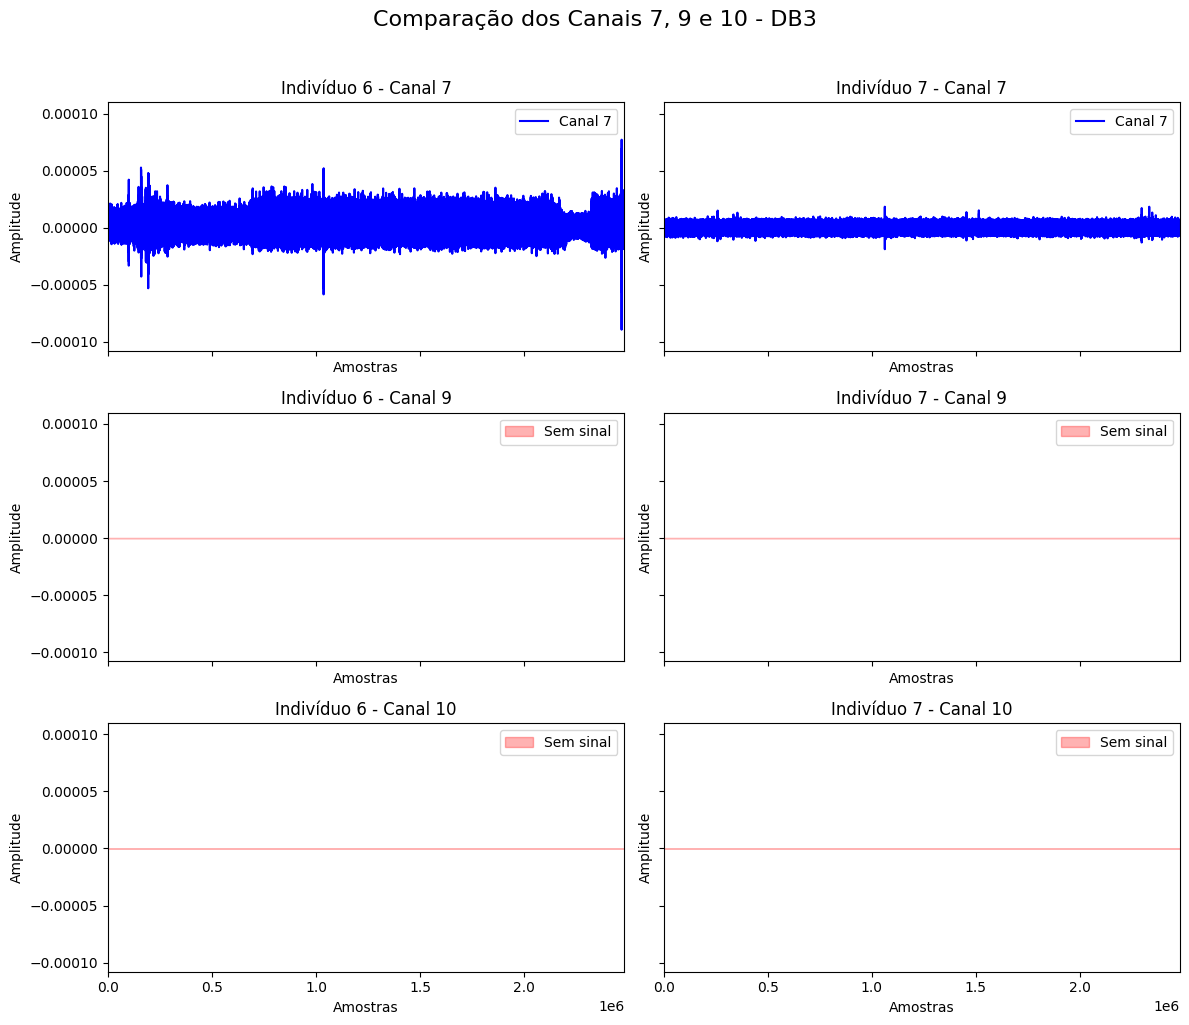

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

subject_6_path = r"D:\Stash\Datasets\DB3\ex2\S6_E2_A1.mat"
subject_7_path = r"D:\Stash\Datasets\DB3\ex2\S7_E2_A1.mat"

def load_emg_data(file_path):
    try:
        data = scipy.io.loadmat(file_path)
        if 'emg' in data:
            return data['emg']
        else:
            return None
    except Exception as e:
        print(f"Erro ao carregar {file_path}: {e}")
        return None


emg_data_6 = load_emg_data(subject_6_path)
emg_data_7 = load_emg_data(subject_7_path)

channels_to_plot = [8, 9]

comparison_channel = 6


fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True, sharey=True)

for i, channel in enumerate([comparison_channel] + channels_to_plot):
    for j, (emg_data, individuo) in enumerate(zip([emg_data_6, emg_data_7], ["Indivíduo 6", "Indivíduo 7"])):
        ax = axes[i, j]

        if emg_data is not None and emg_data.shape[1] > channel:
            signal = emg_data[:, channel]
            if np.all(signal == 0): 
                ax.fill_between(range(len(signal)), signal, color='red', alpha=0.3, label="Sem sinal")
            else:
                ax.plot(signal, color='blue', label=f"Canal {channel+1}")

            ax.legend()
            ax.set_title(f"{individuo} - Canal {channel+1}")
            ax.set_xlabel("Amostras")
            ax.set_ylabel("Amplitude")
            ax.set_xlim([0, len(signal)])
        else:
            ax.text(0.5, 0.5, "Sem dados", horizontalalignment='center', verticalalignment='center', 
                    transform=ax.transAxes, fontsize=12, color="red")

plt.suptitle("Comparação dos Canais 7, 9 e 10 - DB3", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

